# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [184]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [185]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [186]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\BradT\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


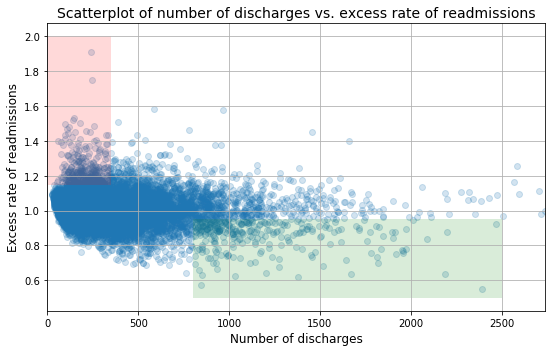

In [187]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## Do you agree with the above analysis and recommendations? Why or why not?

I do not fully agree with the analysis above. 

After performing a hypothesis test, it is evident that there exists a difference between the mean excess readmission rate of small and large facilities at the .01 level of significance.  In addition, the reported statistics are correct. 

I disagree with the conclusion above due to the low correlation between the number of discharges and the excess readmission rate.  While it does exist, it isn't particularly strong, and I believe that there may be a lurking variable that accounts for the difference.  Some thoughts for further analysis inlcude:
* Do states differ in their excess readmission ratios?  If so, is it statistically significant?
* Do the populations that small and large facilities serve differ?  
* Do environmental factors account for readmission rates?

Looking specifically at the smallest facilities, we can see that increasing their size is effective, yet this group experiences some of the greatest variability.  Before making any recommendations, I would want to look for any relationships between the facilities in this group that have the significantly higher ratios.  

##  Provide support for your arguments and your own recommendations with a statistically sound analysis

In order to determine whether there is a difference between the mean excess readmission rate of large and small facilities, we'll perform a hypothesis test for the difference of means.  

\begin{equation} H_0 : \mu_S = \mu_L  \end{equation}

\begin{equation}H_A:  \mu_S \neq \mu_L \end{equation}

In [188]:
small_facilities = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100][['Number of Discharges', 'Excess Readmission Ratio']]
small_facilities = small_facilities[np.isfinite(small_facilities['Excess Readmission Ratio'])]

large_facilities = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000][['Number of Discharges', 'Excess Readmission Ratio']]
large_facilities = large_facilities[np.isfinite(large_facilities['Excess Readmission Ratio'])]

stats.ttest_ind(a=small_facilities['Excess Readmission Ratio'],b=large_facilities['Excess Readmission Ratio'],equal_var=False)

Ttest_indResult(statistic=7.6017424185004856, pvalue=1.2752435451140344e-13)

Our p-value is well below the .01 level of significance.  We reject the null hypothesis and state that there is a difference in the mean excess readmission ratio between small and large facilities.

Below, we will check the reported statistics.


In [189]:
sf_rate = len(small_facilities[small_facilities['Excess Readmission Ratio'] > 1]) / len(small_facilities)
sf_mean_rate = np.mean(small_facilities['Excess Readmission Ratio'])
lf_rate = len(large_facilities[large_facilities['Excess Readmission Ratio'] > 1]) / len(large_facilities)
lf_mean_rate = np.mean(large_facilities['Excess Readmission Ratio'])

print("Small Facilities\nMean Excess Readmission Rate:", sf_mean_rate, '\n', sf_rate, '% of small facilities have a rate greater than 1.\n')
print("Large Facilities\nMean Excess Readmission Rate:", lf_mean_rate, '\n', lf_rate, '% of large facilities have a rate greater than 1.\n')

Small Facilities
Mean Excess Readmission Rate: 1.0226183501683506 
 0.6321548821548821 % of small facilities have a rate greater than 1.

Large Facilities
Mean Excess Readmission Rate: 0.9783354211663071 
 0.4449244060475162 % of large facilities have a rate greater than 1.



We can confirm that the statistics are as is reported in the initial analysis.

Looking at the graph in the initial analysis, we have no sense of distribution of facilities.  Using a jointplot, we can see those distributions as well as the correlation, all in one spot.

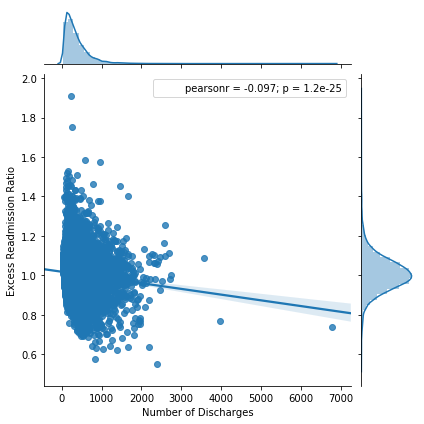

In [190]:
sns.jointplot(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'], kind = 'reg')

There is a small negative correlation between the excess readmission ratio and the number of discharges.  Just for fun, we can look at heatmap of the correlations between all columns in the dataframe.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

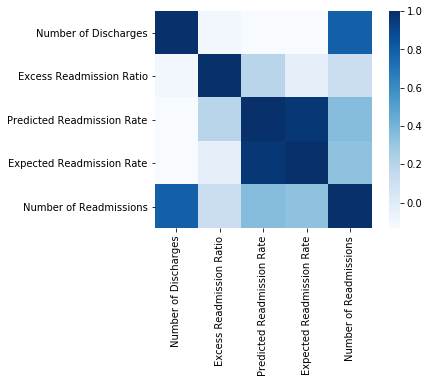

In [191]:
del clean_hospital_read_df['Footnote']
del clean_hospital_read_df['Provider Number']
cm = clean_hospital_read_df.corr()
sns.heatmap(cm, square = True, cmap = 'Blues')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

When we look at the small facilities independently, we see that the correlation is much stronger, even with the presence of the highly influential outliers.  It appears that increasing facility size can have a larger effect at this general size.

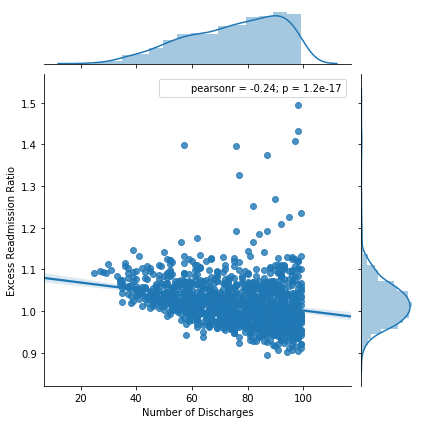

In [192]:
sns.jointplot(small_facilities['Number of Discharges'], small_facilities['Excess Readmission Ratio'], kind = 'reg')

We can see by isolating the larger facilities that there is much greater variation in success.  The correlation is comparable, but the confidence level is much lower.  At this point, we can't be sure that there is a strong relationship between the two variables.

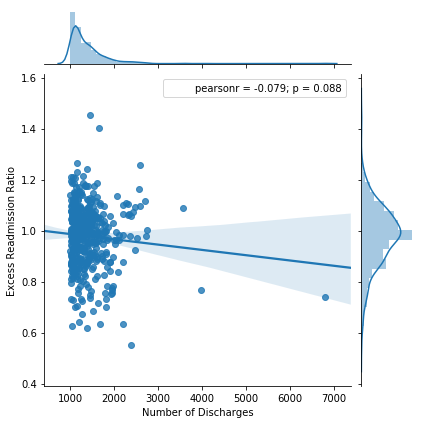

In [193]:
sns.jointplot(large_facilities['Number of Discharges'], large_facilities['Excess Readmission Ratio'], kind = 'reg')